In [85]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import folium
from shapely import wkt

### We are going to explore a Dataset from the [Open Data Österreich](https://www.data.gv.at/suche/)

Trinkbrunnen Standorte Wien data from [here](https://www.data.gv.at/katalog/dataset/2ed52078-7e55-40ea-8036-0d89118a06f4)

In [86]:
url = "https://data.wien.gv.at/daten/geo?service=WFS&request=GetFeature&version=1.1.0&typeName=ogdwien:TRINKBRUNNENOGD&srsName=EPSG:4326&outputFormat=csv"

df = pd.read_csv(url, encoding='utf8')
df['geometry'] = df['SHAPE'].apply(wkt.loads)
df.drop(['SHAPE'], axis=1, inplace=True)
gdf = gpd.GeoDataFrame(df, crs='epsg:3857')

#### Checking the columns of the dataset

In [87]:
gdf.head()

,FID,OBJECTID,BASIS_TYP_TXT,BASIS_TYP,SE_ANNO_CAD_DATA,geometry
0,TRINKBRUNNENOGD.fid--5447af80_1810234cf50_-140,3169101,Trinkbrunnen mit Tränke,5,NaN,POINT (16.418 48.183)
1,TRINKBRUNNENOGD.fid--5447af80_1810234cf50_-13f,3169102,Trinkbrunnen mit Tränke,5,NaN,POINT (16.418 48.182)
2,TRINKBRUNNENOGD.fid--5447af80_1810234cf50_-13e,3169103,Trinkbrunnen mit Tränke,5,NaN,POINT (16.381 48.178)
3,TRINKBRUNNENOGD.fid--5447af80_1810234cf50_-13d,3169104,Trinkbrunnen mit Tränke,5,NaN,POINT (16.383 48.179)
4,TRINKBRUNNENOGD.fid--5447af80_1810234cf50_-13c,3169105,Trinkbrunnen mit Tränke,5,NaN,POINT (16.386 48.292)


In [88]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1740 entries, 0 to 1739
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   FID               1740 non-null   object  
 1   OBJECTID          1740 non-null   int64   
 2   BASIS_TYP_TXT     1740 non-null   object  
 3   BASIS_TYP         1740 non-null   int64   
 4   SE_ANNO_CAD_DATA  0 non-null      float64 
 5   geometry          1740 non-null   geometry
dtypes: float64(1), geometry(1), int64(2), object(2)
memory usage: 81.7+ KB


#### Checking the Projection of the coordinates

In [89]:
gdf.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### Plotting the map right away from the geometry

<AxesSubplot:>

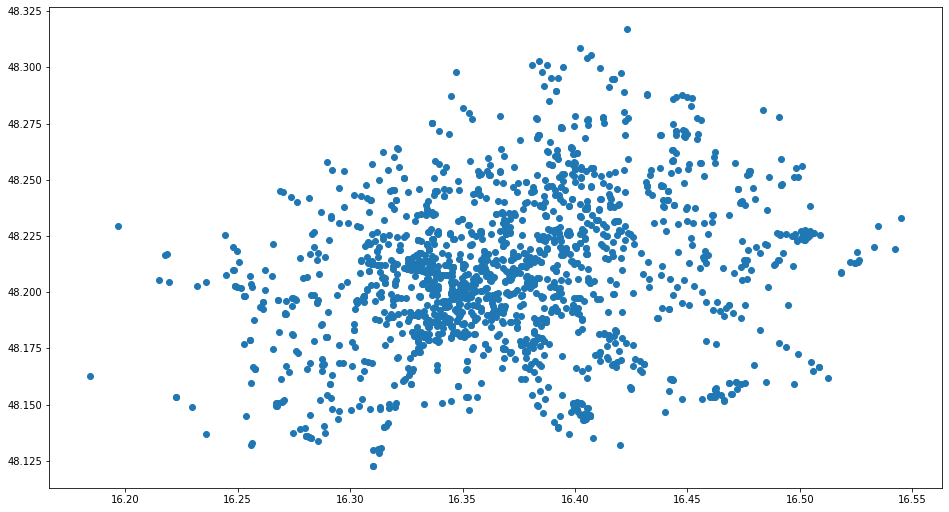

In [90]:
fig,ax = plt.subplots(figsize=(16,16))
gdf.plot(ax=ax)

#### Adding a contextualized basemap

In [111]:
# OpenStreetMap
map = folium.Map(location = [48.20,16.40], tiles='OpenStreetMap' , zoom_start = 11)
map

#### Now, plotting the same map with the information from the geodataframe

In [109]:
# OpenStreetMap
map = folium.Map(location = [48.20,16.40], tiles='OpenStreetMap' , zoom_start = 11)

geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in gdf.geometry ]
for trinkbcoord in geo_df_list:
    map.add_child(folium.Marker(location = trinkbcoord))

map